# Feature Engineering
Feature engineering is used to transform or create features from raw data by using domain knowledge. These features are then used by our models for optimal performance.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

From the above desciptions, we can see that have missing values which we have to deal with at start. We do this first beacause our algorithms do not take null value

# Handling Missing Values
We will use various imputation methods to deal with missing values like
* mean
* median
* mode

In [5]:
age_mean = df.age.mean()
age_median = df.age.median()
age_mode = df.age.mode()

print(age_mean, age_median, age_mode)

29.69911764705882 28.0 0    24.0
Name: age, dtype: float64


Above we have our mean, median and mode of age respectively. We will use median to fill our values

In [6]:
df.age = df.age.fillna(age_median)

In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

As we can see our missing age values are dealt with. Now we see that we have embarked and embarked_town where 2 values are missing, as these are relatively small records, we can drop them.

In [8]:
df = df.dropna(subset=["embarked", "embark_town"])

In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

We can now see that we only deck to deal with. Lets see the values of deck

In [10]:
deck_values = df.deck.unique()
list(deck_values)

[nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F']

## Encoding categorical data
We can use this categorical data to transform this into numbers so our algorithm can use it. We will use a mapping function for it.

In [11]:
def deck_mapper(x):
    deck_dict = {"A": 1, "B": 2, "C": 3, "D": 4, "E":5, "F": 6, "G": 7}
    if x:
        return deck_dict[x.upper()]

df.deck = df.deck.apply(deck_mapper)
df = df.fillna(value=0, axis=1)

In [12]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

As we can see, now we have no missing values. Lets move on to the next step.

# Feature Scaling
This process deals with converting the scales of our features into a common or similar scale, so that when we have features with vastly different scales, our algorithm's performance won't be affected. This process is also called z-score normalisation.

In [13]:
df = sns.load_dataset('car_crashes')
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


Here we have a dataset with features having different scales. We will apply scaling on each of them. These numbers include percent of total drivers and the value in dollars.

In [14]:
scaler = StandardScaler()
scaler.fit(df.iloc[:, :-1])
df_scaled = scaler.transform(df.iloc[:, :-1])
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])

In [15]:
df_scaled.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,0.737446,1.168148,0.439938,1.002301,0.277692,-0.580083,0.430514
1,0.565936,1.212695,-0.211311,0.608532,0.807258,0.943258,-0.022900
2,0.688443,0.756709,0.187615,0.459357,1.033141,0.070876,-0.981778
3,1.619498,-0.483614,0.547408,1.676052,1.951700,-0.337701,0.321125
4,-0.928653,-0.399524,-0.891763,-0.594276,-0.891968,-0.048418,1.266178


In [16]:
df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


In [17]:
df_scaled.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,6.291264e-16,-8.707632e-18,-1.730642e-16,-3.858569e-16,-1.534720e-16,3.635436e-16,-2.068062e-16
std,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00
min,-2.423242e+00,-1.604809e+00,-1.923831e+00,-2.645993e+00,-2.174301e+00,-1.387777e+00,-2.104130e+00
25%,-7.448923e-01,-6.165054e-01,-5.798646e-01,-6.932781e-01,-7.127632e-01,-6.713940e-01,-8.071227e-01
50%,-4.660081e-02,-1.953063e-01,-1.943724e-01,6.357267e-02,-6.167066e-02,-1.585346e-01,6.330968e-02
75%,6.639414e-01,7.211710e-01,4.189107e-01,5.749341e-01,7.377755e-01,6.853269e-01,7.066285e-01
max,1.987020e+00,2.228278e+00,3.008718e+00,2.259537e+00,1.951700e+00,2.348268e+00,2.451560e+00


We now have made the scaling of all these data same. We can see that mean is near 0 and standard deviation is near 1.We now have only one task left.

# Outliers
Outliers are anomalies within our data which do not conform to the rules of their respective feature. We have to deal with them as they have the potential to create bias in our model with their presence.

<Axes: >

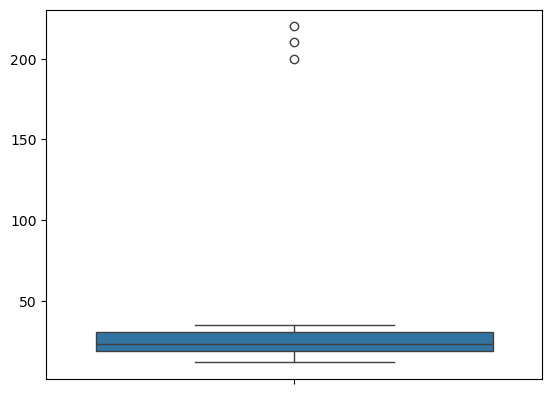

In [18]:
uncleaned_data = [12, 14, 15, 15, 16, 17, 18, 19, 20, 21, 21, 22, 22, 23, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 200, 210, 220]
sns.boxplot(uncleaned_data)

From our boxplot alone it is quiet clear that we have outliers within our data. To deal with them we will IQR method. This method creates lower and upper whiskers which operate as bounds and if a value is out of this bound then it is classified as an outlier.

In [19]:
def find_median(records, length):
    if not length % 2:
        median_index = int(length/2)
        median = records[median_index]
    else:
        median_indexes = int(length/2), int(length/2) + 1
        median = (records[median_indexes[0]] + records[median_indexes[0]]) / 2
    return median

def return_iqr(records, length):
    q2_of_records = find_median(records, length)

    q1_of_records = [ele for ele in records if ele < q2_of_records]
    total_q1 = len(q1_of_records)
    q1_median = find_median(q1_of_records, total_q1)

    q3_of_records = [ele for ele in records if ele > q2_of_records]
    total_q3 = len(q3_of_records)
    q3_median = find_median(q3_of_records, total_q3)

    return q1_median, q2_of_records, q3_median

q1_median, q2_median, q3_median = return_iqr(uncleaned_data, len(uncleaned_data))
iqr = q3_median - q1_median
print(q1_median, q2_median, q3_median, iqr)

19.0 24 32 13.0


These values represent our 25th percentile, 50th percentile, 75th percentile and iqr respectively. We will now create lower whisker and upper whisker.

In [20]:
lw = max(min(uncleaned_data), q1_median - 1.5*iqr)
uw = min(max(uncleaned_data), q3_median + 1.5*iqr)
print(lw, uw)

12 51.5


These values represent our lower bounds and upper bounds. Lets filter our data.

In [21]:
cleaned_data = [ele for ele in uncleaned_data if lw<=ele<=uw]
cleaned_data

[12,
 14,
 15,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 21,
 22,
 22,
 23,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35]

We can verify the filter by running boxplot on it.

<Axes: >

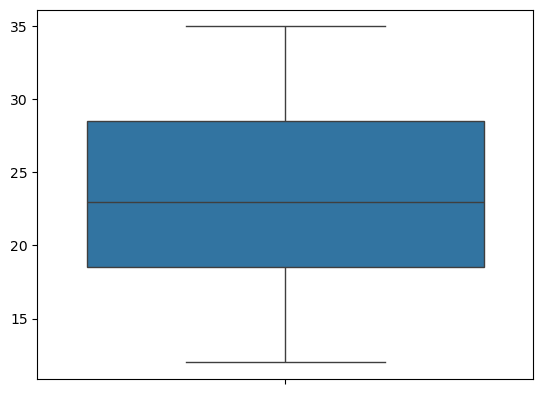

In [22]:
sns.boxplot(cleaned_data)

We now have gotten rid of outliers